In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score

In [4]:
df = pd.read_csv("Mall_Customers.csv")
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
features = df[['Annual Income (k$)', 'Spending Score (1-100)', 'Age']]

In [6]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(features)
print(X_scaled)

[[-1.73899919 -0.43480148 -1.42456879]
 [-1.73899919  1.19570407 -1.28103541]
 [-1.70082976 -1.71591298 -1.3528021 ]
 [-1.70082976  1.04041783 -1.13750203]
 [-1.66266033 -0.39597992 -0.56336851]
 [-1.66266033  1.00159627 -1.20926872]
 [-1.62449091 -1.71591298 -0.27630176]
 [-1.62449091  1.70038436 -1.13750203]
 [-1.58632148 -1.83237767  1.80493225]
 [-1.58632148  0.84631002 -0.6351352 ]
 [-1.58632148 -1.4053405   2.02023231]
 [-1.58632148  1.89449216 -0.27630176]
 [-1.54815205 -1.36651894  1.37433211]
 [-1.54815205  1.04041783 -1.06573534]
 [-1.54815205 -1.44416206 -0.13276838]
 [-1.54815205  1.11806095 -1.20926872]
 [-1.50998262 -0.59008772 -0.27630176]
 [-1.50998262  0.61338066 -1.3528021 ]
 [-1.43364376 -0.82301709  0.94373197]
 [-1.43364376  1.8556706  -0.27630176]
 [-1.39547433 -0.59008772 -0.27630176]
 [-1.39547433  0.88513158 -0.99396865]
 [-1.3573049  -1.75473454  0.51313183]
 [-1.3573049   0.88513158 -0.56336851]
 [-1.24279661 -1.4053405   1.08726535]
 [-1.24279661  1.23452563

In [9]:
results = []
for k in range(2, 6):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X_scaled)
    silhouette = silhouette_score(X_scaled, labels)
    db_index = davies_bouldin_score(X_scaled, labels)    
    results.append({'k': k, 'Silhouette Score': silhouette, 'Davies-Bouldin Index': db_index})   
    if k == 3:
        best_k_labels = labels
        best_k_centers = kmeans.cluster_centers_


In [11]:
results_df = pd.DataFrame(results)
print(" Clustering Evaluation Scores:\n", results_df)


 Clustering Evaluation Scores:
    k  Silhouette Score  Davies-Bouldin Index
0  2          0.335472              1.260682
1  3          0.357923              1.032689
2  4          0.403958              0.930796
3  5          0.408469              0.888969


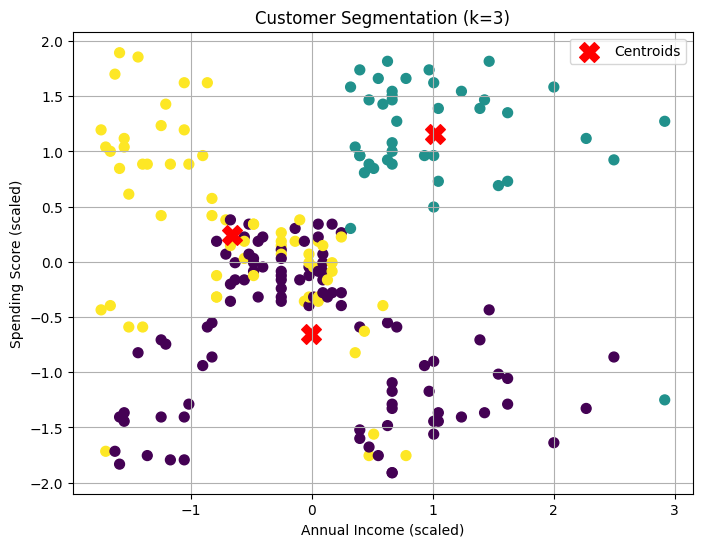

In [12]:
plt.figure(figsize=(8, 6))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=best_k_labels, cmap='viridis', s=50)
plt.scatter(best_k_centers[:, 0], best_k_centers[:, 1], c='red', s=200, marker='X', label='Centroids')
plt.xlabel("Annual Income (scaled)")
plt.ylabel("Spending Score (scaled)")
plt.title("Customer Segmentation (k=3)")
plt.legend()
plt.grid(True)
plt.show()